# Criando os Nomes

In [6]:
import pandas as pd

In [7]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

Somou a quantidade dos nomes femininos e masculino e exibiu.

In [8]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


Colocando dentro de uma lista os nomes fem a masc.

In [9]:
frames = [nomes_f, nomes_m]

**pd.concat(frames)** - coloca em uma unica tabela dos nomes

---

**['nome'].to_frame()** - extrair dataframe apenas a coluna nome.


In [10]:
nomes = pd.concat(frames)['nome'].to_frame()

**.sample** - exibe valores aleatórios

In [11]:
nomes.sample(5)

,nome
138,NEUSA
81,MICHELE
22,ANDRE
32,SIMONE
179,IAGO


# Incluindo ID dos alunos

In [12]:
import numpy as np

**np.random.seed(123)** - Irá gerar um número aleatório depois do 123

In [13]:
np.random.seed(123)

In [14]:
total_alunos = len(nomes)
total_alunos

400

In [15]:
nomes["Id_Aluno"] = np.random.permutation(total_alunos) + 1
nomes.sample(5)

,nome,Id_Aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


**Criando domínios de email para os alunos**

In [16]:
dominios = ['@dominiodoemail', '@servicodoemail']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,Id_Aluno,dominio
0,MARIA,235,@dominiodoemail
1,ANA,43,@servicodoemail
2,FRANCISCA,304,@servicodoemail
3,ANTONIA,156,@dominiodoemail
4,ADRIANA,343,@servicodoemail
...,...,...,...
195,WALTER,231,@dominiodoemail
196,ARLINDO,99,@servicodoemail
197,MICHAEL,323,@dominiodoemail
198,ALVARO,383,@dominiodoemail


In [17]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,Id_Aluno,dominio,email
84,SEVERINO,78,@dominiodoemail,severino@dominiodoemail
0,JOSE,331,@servicodoemail,jose@servicodoemail
179,IAGO,340,@dominiodoemail,iago@dominiodoemail
10,SANDRA,174,@dominiodoemail,sandra@dominiodoemail
171,TERESINHA,45,@dominiodoemail,teresinha@dominiodoemail


# Criando a Tabela Cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
import html5lib

In [21]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [22]:
type(cursos)

list

convertendo a lista em dataframe

In [24]:
cursos = cursos[0]

In [25]:
type(cursos)

pandas.core.frame.DataFrame

In [26]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [28]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [29]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [30]:
cursos['id'] = cursos.index + 1

In [31]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [32]:
cursos = cursos.set_index('id')

In [33]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [34]:
nomes.sample(5)

,nome,Id_Aluno,dominio,email
114,ARTHUR,320,@dominiodoemail,arthur@dominiodoemail
57,DAIANE,303,@servicodoemail,daiane@servicodoemail
85,HELENA,221,@dominiodoemail,helena@dominiodoemail
183,IRACI,8,@dominiodoemail,iraci@dominiodoemail
189,DALVA,137,@dominiodoemail,dalva@dominiodoemail


# Matriculando os Alunos nos Cursos

In [39]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [40]:
nomes.sample(3)

,nome,Id_Aluno,dominio,email,matriculas
67,HENRIQUE,64,@dominiodoemail,henrique@dominiodoemail,4
102,MARILENE,149,@dominiodoemail,marilene@dominiodoemail,1
49,ALEX,337,@dominiodoemail,alex@dominiodoemail,1


In [41]:
nomes.matriculas.describe()

count    400.000000
mean       2.030000
std        1.493209
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: matriculas, dtype: float64

In [42]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


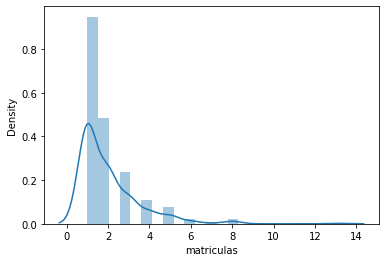

In [43]:
sns.distplot(nomes.matriculas)

In [44]:
nomes.matriculas.value_counts()

1     198
2     101
3      50
4      23
5      16
8       5
6       5
13      1
7       1
Name: matriculas, dtype: int64

In [45]:
nomes.sample(5)

,nome,Id_Aluno,dominio,email,matriculas
189,DALVA,137,@dominiodoemail,dalva@dominiodoemail,2
18,RAIMUNDO,70,@dominiodoemail,raimundo@dominiodoemail,1
8,PATRICIA,379,@servicodoemail,patricia@servicodoemail,5
3,ANTONIA,156,@dominiodoemail,antonia@dominiodoemail,1
57,DAIANE,303,@servicodoemail,daiane@servicodoemail,1


# Selecionando Cursos

In [47]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [50]:
for index, row in nomes.iterrows():
  id = row.Id_Aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['Id_Aluno', 'id_curso'])

In [51]:
matriculas.head()

,Id_Aluno,id_curso
0,235,15
1,235,11
2,235,1
3,43,15
4,43,11


In [53]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'Id_Aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python
6,25,PHP com MySql
7,60,.NET para web
8,53,Novas integrações com Java
9,4,TDD com Java


In [54]:
nomes.sample(3)

,nome,Id_Aluno,dominio,email,matriculas
58,DAVI,131,@servicodoemail,davi@servicodoemail,1
122,ADAO,234,@dominiodoemail,adao@dominiodoemail,2
123,EVANDRO,52,@dominiodoemail,evandro@dominiodoemail,2


In [55]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [56]:
matriculas.head()

,Id_Aluno,id_curso
0,235,15
1,235,11
2,235,1
3,43,15
4,43,11


In [57]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'Id_Aluno' : 'quantidade_de_alunos'})

In [59]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python


# Saída em diferentes formatos

In [60]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python


In [61]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [62]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,49,Lógica de programação
1,42,Java para Web
2,21,C# para Web
3,4,Ruby on Rails
4,42,Cursos de Python
5,25,PHP com MySql
6,60,.NET para web
7,53,Novas integrações com Java
8,4,TDD com Java
9,59,Código limpo com C#


In [63]:
matriculas_json = matriculas_por_curso.to_json()

In [64]:
matriculas_json

'{"quantidade_de_alunos":{"1":49,"2":42,"3":21,"4":4,"5":42,"6":25,"7":60,"8":53,"9":4,"10":59,"11":66,"12":65,"13":21,"14":67,"15":89,"16":58,"17":66,"18":3,"19":13,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [65]:
matriculas_html = matriculas_por_curso.to_html()

In [67]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>21</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>42</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>25</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>60</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>53</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>4</td>
  

# Criando o banco Sql

In [68]:
!pip install sqlalchemy

In [71]:
from sqlalchemy import create_engine, MetaData, Table

In [73]:
engine = create_engine('sqlite:///:memory:')

In [74]:
engine

Engine(sqlite:///:memory:)

In [75]:
type(engine)

sqlalchemy.engine.base.Engine

In [77]:
matriculas_por_curso.to_sql('matriculas', engine)

In [78]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [79]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [83]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,9,4,TDD com Java
2,18,3,Programação funcional
3,19,13,Boas práticas em Java
4,20,5,Orientação objetos com Java


In [84]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,49
1,Java para Web,42
2,C# para Web,21
3,Ruby on Rails,4
4,Cursos de Python,42
5,PHP com MySql,25
6,.NET para web,60
7,Novas integrações com Java,53
8,TDD com Java,4
9,Código limpo com C#,59


In [85]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [92]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [93]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
14,Análise de dados,89


# Escrevendo no banco

In [94]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [95]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [97]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python
6,25,PHP com MySql
7,60,.NET para web
8,53,Novas integrações com Java
9,4,TDD com Java


In [98]:
matriculas

,Id_Aluno,id_curso
0,235,15
1,235,11
2,235,1
3,43,15
4,43,11
...,...,...
807,323,13
808,383,12
809,383,15
810,366,5


In [102]:
id_curso = 5
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,Id_Aluno,id_curso
23,174,5
40,200,5
79,333,5
123,193,5
158,115,5
187,148,5
190,148,5
209,56,5
210,31,5
214,300,5


In [103]:
nomes.sample(3)

,nome,Id_Aluno,dominio,email,matriculas
191,ERICK,124,@dominiodoemail,erick@dominiodoemail,1
174,DENIS,69,@servicodoemail,denis@servicodoemail,1
181,YURI,225,@servicodoemail,yuri@servicodoemail,1


In [104]:
proxima_turma.set_index('Id_Aluno').join(nomes.set_index('Id_Aluno'))

,id_curso,nome,dominio,email,matriculas
Id_Aluno,,,,,
11,5,PAULO,@servicodoemail,paulo@servicodoemail,3
30,5,SEBASTIANA,@dominiodoemail,sebastiana@dominiodoemail,13
31,5,VILMA,@servicodoemail,vilma@servicodoemail,1
44,5,NICOLAS,@dominiodoemail,nicolas@dominiodoemail,1
52,5,EVANDRO,@dominiodoemail,evandro@dominiodoemail,2
56,5,ELISANGELA,@dominiodoemail,elisangela@dominiodoemail,2
58,5,NATANAEL,@servicodoemail,natanael@servicodoemail,2
85,5,ANGELO,@servicodoemail,angelo@servicodoemail,2
97,5,ELTON,@dominiodoemail,elton@dominiodoemail,2


In [105]:
proxima_turma.set_index('Id_Aluno').join(nomes.set_index('Id_Aluno'))['nome']

Id_Aluno
11          PAULO
30     SEBASTIANA
31          VILMA
44        NICOLAS
52        EVANDRO
56     ELISANGELA
58       NATANAEL
85         ANGELO
97          ELTON
110       OSVALDO
115        SILVIA
139        SERGIO
148         THAIS
148         THAIS
153     CONCEICAO
155        CLEBER
165        REBECA
174        SANDRA
178       JOSIANE
181        MOACIR
188     ALEXANDRE
193    ALESSANDRA
196       ADRIANO
200      GABRIELA
216        VICTOR
229        NAIARA
244     VANDERLEI
250    ELIZANGELA
272        OTAVIO
295        MAICON
300       GEOVANA
313       EDVALDO
316     FRANCIELE
333     ROSANGELA
335      DENILSON
352        SAMARA
356       RONALDO
366       GEOVANE
369       POLIANA
380          ELZA
397        LILIAN
398      CRISTIAN
Name: nome, dtype: object

In [106]:
proxima_turma.set_index('Id_Aluno').join(nomes.set_index('Id_Aluno'))['nome'].to_frame()

,nome
Id_Aluno,
11,PAULO
30,SEBASTIANA
31,VILMA
44,NICOLAS
52,EVANDRO
56,ELISANGELA
58,NATANAEL
85,ANGELO
97,ELTON


In [107]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [108]:
nome_curso = nome_curso.nome_do_curso 
nome_curso

'Cursos de Python'

In [109]:
proxima_turma = proxima_turma.set_index('Id_Aluno').join(nomes.set_index('Id_Aluno'))['nome'].to_frame()

In [110]:
proxima_turma

,nome
Id_Aluno,
11,PAULO
30,SEBASTIANA
31,VILMA
44,NICOLAS
52,EVANDRO
56,ELISANGELA
58,NATANAEL
85,ANGELO
97,ELTON


In [113]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos dos {}'.format(nome_curso)})

In [114]:
proxima_turma.sample(5)

,Alunos dos Cursos de Python
Id_Aluno,
250,ELIZANGELA
369,POLIANA
398,CRISTIAN
56,ELISANGELA
352,SAMARA


# Excel

In [115]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [116]:
pd.read_excel('proxima_turma.xlsx')

,Alunos dos Cursos de Python
0,PAULO
1,SEBASTIANA
2,VILMA
3,NICOLAS
4,EVANDRO
5,ELISANGELA
6,NATANAEL
7,ANGELO
8,ELTON
9,OSVALDO
